In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [150]:
dataset = 'esol'

# target vs. pred용 dataset
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\MAE')
df_outer_MAE = pd.read_csv('result_' + dataset + '_outer.csv')
df_egcn_MAE = pd.read_csv('result_' + dataset + '_egcn.csv')

os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\MSE')
df_outer_MSE = pd.read_csv('result_' + dataset + '_outer.csv')
df_egcn_MSE = pd.read_csv('result_' + dataset + '_egcn.csv')

print(df_outer_MAE.shape[1])
print(df_outer_MSE.shape[1])

45
45


In [151]:
# MAE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_outer_MAE.shape[1]-1)]
df_outer_MAE.columns = columns

columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_egcn_MAE.shape[1]-1)]
df_egcn_MAE.columns = columns

# MSE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_outer_MSE.shape[1]-1)]
df_outer_MSE.columns = columns

columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_egcn_MSE.shape[1]-1)]
df_egcn_MSE.columns = columns

# Scatter plot (MAE)

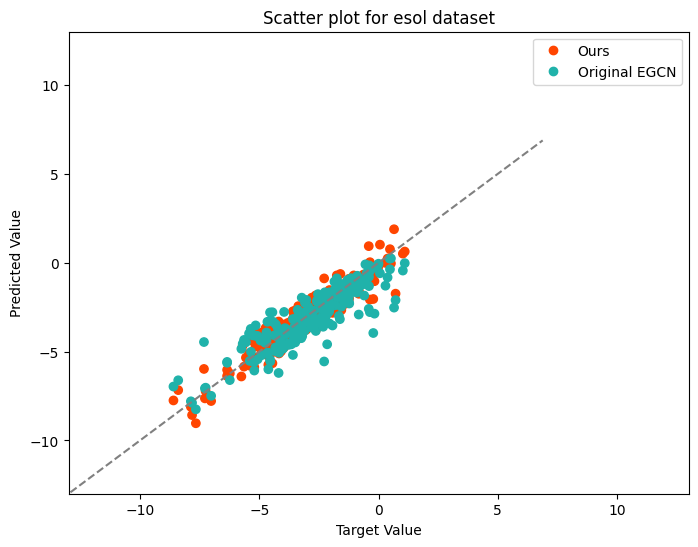

In [152]:
df_outer_MAE['source'] = 'outer'
df_egcn_MAE['source'] = 'egcn'
df_combined = pd.concat([df_outer_MAE, df_egcn_MAE], ignore_index = True)

plt.figure(figsize = (8, 6))

from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


scatter = plt.scatter(df_combined['target'], df_combined['pred'],
            c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
            cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_combined['target'].min(), df_combined['pred'].min()) - 5
max_val = max(df_combined['target'].max(), df_combined['pred'].max()) + 5
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

legend_labels = ['Ours', 'Original EGCN']
legend_handles = scatter.legend_elements()[0]
plt.legend(legend_handles, legend_labels)

plt.xlim(-13, 13)
plt.ylim(-13, 13)
plt.xlabel("Target Value")
plt.ylabel("Predicted Value")
plt.title(f"Scatter plot for {dataset} dataset")

# 저장
plt.savefig(f'result_{dataset}_scatter_MAE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# Scatter plot (MSE)

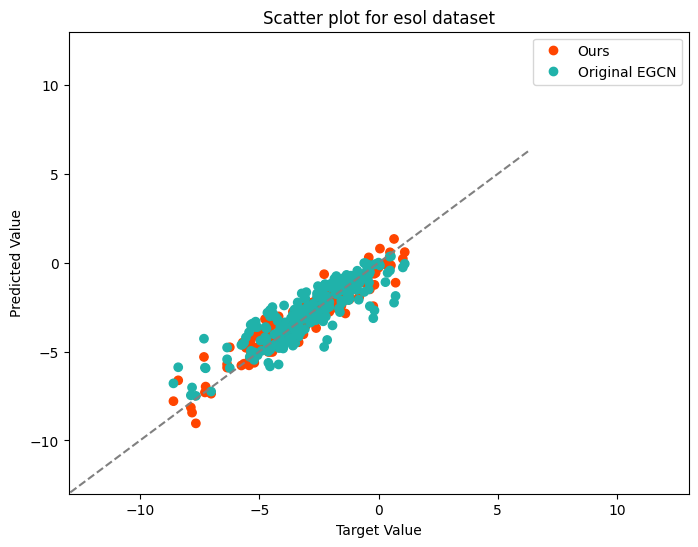

In [153]:
df_outer_MSE['source'] = 'outer'
df_egcn_MSE['source'] = 'egcn'
df_combined = pd.concat([df_outer_MSE, df_egcn_MSE], ignore_index = True)

plt.figure(figsize = (8, 6))

from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


scatter = plt.scatter(df_combined['target'], df_combined['pred'],
            c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
            cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_combined['target'].min(), df_combined['pred'].min()) - 5
max_val = max(df_combined['target'].max(), df_combined['pred'].max()) + 5
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')

legend_labels = ['Ours', 'Original EGCN']
legend_handles = scatter.legend_elements()[0]
plt.legend(legend_handles, legend_labels)

plt.xlim(-13, 13)
plt.ylim(-13, 13)
plt.xlabel("Target Value")
plt.ylabel("Predicted Value")
plt.title(f"Scatter plot for {dataset} dataset")

# 저장
plt.savefig(f'result_{dataset}_scatter_MSE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# Loss Function

In [154]:
# MAE
# loss function용 dataset
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\MAE')
loss_outer_MAE = pd.read_csv('train_losses_' + dataset + '_outer.csv')

print(loss_outer_MAE)
print(type(loss_outer_MAE['Train Loss'][0]))

# str형 리스트를 리스트 타입으로 변경
import ast
loss_outer_MAE['Train Loss'] = loss_outer_MAE['Train Loss'].apply(ast.literal_eval)

print(loss_outer_MAE)
print(type(loss_outer_MAE['Train Loss'][0]))


# MSE
# loss function용 dataset
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\MSE')
loss_outer_MSE = pd.read_csv('train_losses_' + dataset + '_outer.csv')

print(loss_outer_MSE)
print(type(loss_outer_MSE['Train Loss'][0]))

# str형 리스트를 리스트 타입으로 변경
import ast
loss_outer_MSE['Train Loss'] = loss_outer_MSE['Train Loss'].apply(ast.literal_eval)

print(loss_outer_MSE)
print(type(loss_outer_MSE['Train Loss'][0]))

   Fold                                         Train Loss
0     1  [2.901077458705183, 2.377220287026957, 1.91810...
1     2  [2.978757847703481, 2.478797045621005, 2.00869...
2     3  [2.9609652073050285, 2.4249317265402714, 1.978...
3     4  [2.9258946991812627, 2.406413456817424, 1.9462...
4     5  [2.9895209905836317, 2.4967150115966796, 2.049...
<class 'str'>
   Fold                                         Train Loss
0     1  [2.901077458705183, 2.377220287026957, 1.91810...
1     2  [2.978757847703481, 2.478797045621005, 2.00869...
2     3  [2.9609652073050285, 2.4249317265402714, 1.978...
3     4  [2.9258946991812627, 2.406413456817424, 1.9462...
4     5  [2.9895209905836317, 2.4967150115966796, 2.049...
<class 'list'>
   Fold                                         Train Loss
0     1  [10.350596804312222, 7.024508412820008, 4.9131...
1     2  [10.911783154946473, 7.58754336490335, 5.37697...
2     3  [10.579695995525352, 7.341095245598161, 5.1949...
3     4  [10.49501667741661

In [155]:
# 5-fold 데이터프레임 정의
# MAE
loss_fold_5_MAE = loss_outer_MAE['Train Loss'][4]

df_loss_MAE = pd.DataFrame()
df_loss_MAE['Epoch'] = range(1, 301)
df_loss_MAE['Loss'] = loss_fold_5_MAE

print(df_loss_MAE)

# MSE
loss_fold_5_MSE = loss_outer_MSE['Train Loss'][4]

df_loss_MSE = pd.DataFrame()
df_loss_MSE['Epoch'] = range(1, 301)
df_loss_MSE['Loss'] = loss_fold_5_MSE

print(df_loss_MSE)

     Epoch      Loss
0        1  2.989521
1        2  2.496715
2        3  2.049293
3        4  1.600297
4        5  1.150745
..     ...       ...
295    296  0.390810
296    297  0.351428
297    298  0.445633
298    299  0.379443
299    300  0.358233

[300 rows x 2 columns]
     Epoch       Loss
0        1  10.913222
1        2   7.607207
2        3   5.418058
3        4   3.779318
4        5   2.498640
..     ...        ...
295    296   0.227945
296    297   0.167084
297    298   0.299404
298    299   0.234791
299    300   0.177042

[300 rows x 2 columns]


# Loss (MAE)

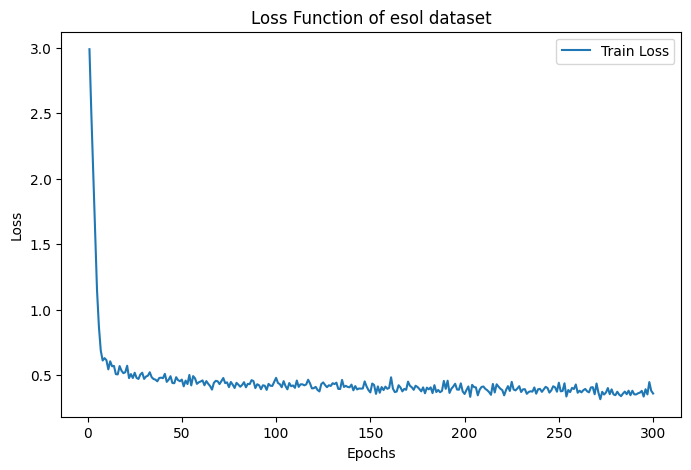

In [156]:
plt.figure(figsize = (8, 5))
plt.plot(df_loss_MAE['Epoch'], df_loss_MAE['Loss'])

plt.title(f'Loss Function of {dataset} dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss'])

# 저장
plt.savefig(f'Loss_{dataset}_MAE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# Loss (MSE)

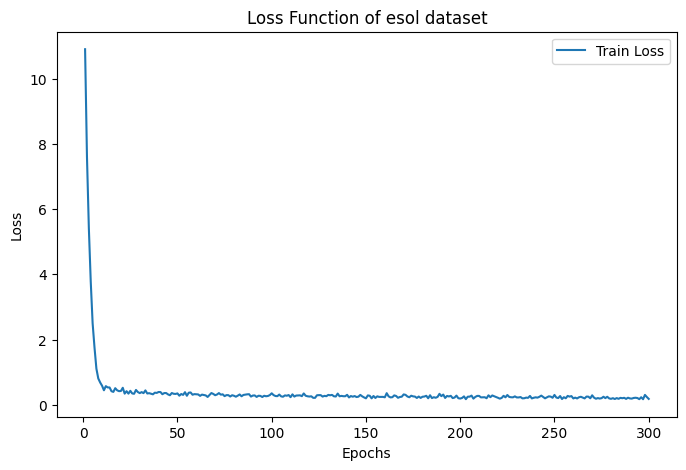

In [157]:
plt.figure(figsize = (8, 5))
plt.plot(df_loss_MSE['Epoch'], df_loss_MSE['Loss'])

plt.title(f'Loss Function of {dataset} dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss'])

# 저장
plt.savefig(f'Loss_{dataset}_MSE.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# 잔차 MAE

In [158]:
# df_outer_MAE['source'] = 'outer'
# df_egcn_MAE['source'] = 'egcn'
# df_combined = pd.concat([df_outer_MAE, df_egcn_MAE], ignore_index = True)

# # 잔차차
# residuals = df_combined['target'] - df_combined['pred']

# plt.figure(figsize = (8, 6))

# from matplotlib.colors import ListedColormap
# pastel_cmap = ListedColormap(["#FF4500", "#20B2AA"])


# scatter = plt.scatter(df_combined['pred'], residuals,
#             c = df_combined['source'].apply(lambda x:0 if x == 'outer' else 1),
#             cmap = pastel_cmap)

# # 수평선 추가
# plt.axhline(0, color = 'grey', linestyle = '--')

# legend_labels = ['Ours', 'Original EGCN']
# legend_handles = scatter.legend_elements()[0]
# plt.legend(legend_handles, legend_labels)

# plt.xlim(-10, 15)
# plt.ylim(-10, 10)
# plt.xlabel("Predicted Value")
# plt.ylabel("Residual")
# plt.title(f"Residual plot for {dataset} dataset")

# # 저장
# plt.savefig(f'result_{dataset}_residual_MAE.png', dpi = 300, bbox_inches = 'tight')

# plt.show()